#  Build Sentiment Classification Application with Streamlit

## What is NLP

Natural Language Processing (NLP) is the field of Artificial Intelligence concerned with the processing and understanding of human language. Since its inception during the 1950s, machine understanding of language has played a pivotal role in translation, topic modeling, document indexing, information retrieval, and extraction.

## Application of NLP

- Text Classification
- Spam Filters
- Voice text messaging
- Sentiment analysis
- Spell or grammar check
- Chat bot
- Search Suggestion
- Search Autocorrect
- Automatic Review Analysis system
- Machine translation
- And so much more

## Data Cleaning Options
- Case Normalization
- Removing Stop Words
- Removing Punctuations or Special Symbols
- Lemmatization or Stemming
- TF-IDF

## Word Embeddings

### Bag of Words - The Simplest Word Embedding Technique

This is one of the simplest methods of embedding words into numerical vectors. It is not often used in practice due to its oversimplification of language, but often the first embedding technique to be taught in the classroom setting.

```
doc1 = "I am high"
doc2 = "Yes I am high"
doc3 = "I am kidding"

```

In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install beautifulsoup4
#!pip install textblob
#!pip install mlxtend

In [ ]:
#!pip install googletrans==3.1.0a0

# Let's Get Started

### Data Loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/IMDB-Dataset.csv')

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Preprocessing

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# List of stopwords
stop_words = set(stopwords.words('english'))

# Function to count words
def count_words(text):
    words = word_tokenize(text)
    return len(words)

# Function to count characters
def count_characters(text):
    return len(text)

# Function to calculate average word length
def avg_word_length(text):
    words = word_tokenize(text)
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

# Function to count stopwords
def count_stopwords(text):
    words = word_tokenize(text)
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

# Function to remove stopwords from the review
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_sentence = ' '.join([word for word in words if word.lower() not in stop_words])
    return filtered_sentence


# Create DataFrame
data = pd.DataFrame(df)

# Create new columns in the DataFrame based on the functions
data['word_counts'] = data['review'].apply(count_words)
data['char_counts'] = data['review'].apply(count_characters)
data['avg_wordlength'] = data['review'].apply(avg_word_length)
data['stopwords_counts'] = data['review'].apply(count_stopwords)
data['review_without_stopwords'] = data['review'].apply(remove_stopwords)

# Display the final DataFrame
print(data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
data.head()

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,One of the other reviewers has mentioned that ...,positive,380,1761,3.828947,142,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,201,998,4.174129,72,wonderful little production . < br / > < br / ...
2,I thought this was a wonderful way to spend ti...,positive,205,926,3.741463,80,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,175,748,3.491429,66,Basically 's family little boy ( Jake ) thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,283,1317,3.851590,100,Petter Mattei 's `` Love Time Money '' visuall...


**STOP WORDS**
```
{'call', 'upon', 'still', 'nevertheless', 'down', 'every', 'forty', '‘re', 'always', 'whole', 'side', "n't", 'now', 'however', 'an', 'show', 'least', 'give', 'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 'eight', 'somewhere', 'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 'eleven', 'after', 'no', '’ll', 'others', 'ourselves', 'themselves', 'though', 'that', 'nor', 'just', '’s', 'before', 'had', 'toward', 'another', 'should', 'herself', 'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 'third', 'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 'none', 'be', 'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore', 'us', 'how', 'was', 'made', 'the', 'or', 'may', '’re', 'namely', "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in', 'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again', 'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put', "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone', 'but', 'some', 'regarding', '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it', 'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while', 'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand', 'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they', 'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six', 'back', 'with', 'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence', 'ten', 'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone', 'something', 'formerly', 'without', 'above', 'onto', 'except', 'enough', 'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often', 'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards', 'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite', '’ve', 'about', 'even'}
```

In [ ]:
data.columns

Index(['review', 'sentiment', 'word_counts', 'char_counts', 'avg_wordlength',
       'stopwords_counts', 'review_without_stopwords'],
      dtype='object')

In [ ]:
import seaborn as sns

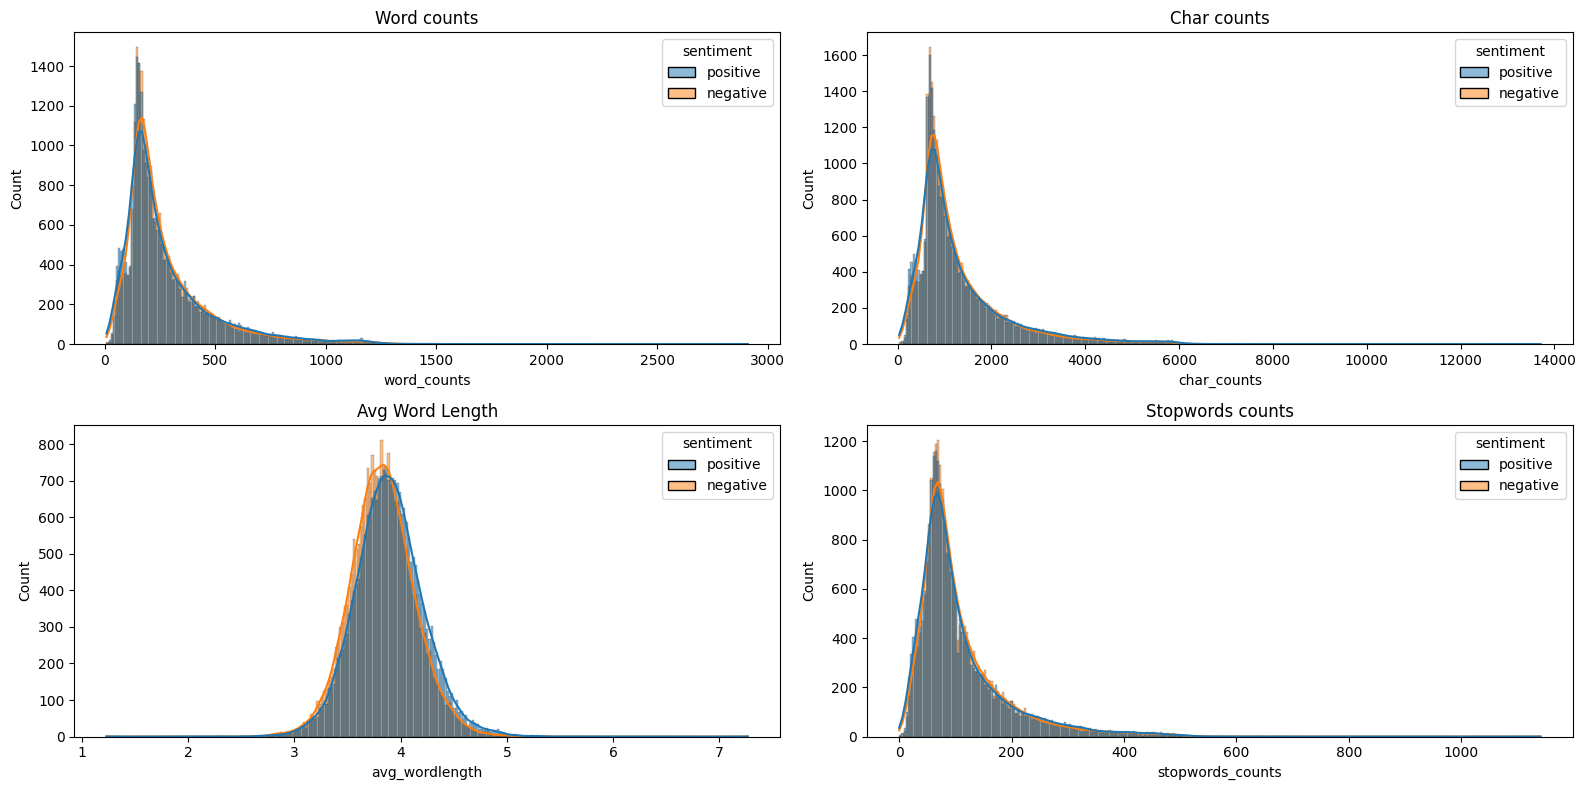

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=data)
sns.histplot(data=data, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=data, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=data, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=data, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()


### Model Building and Word Embedding

### Support Vector Machine (SVM)
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems.
- In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well

#### Advantages
- SVM works relatively well when there is clear margin of separation between classes
- SVM is more effective in high dimensional spaces.
- SVM is effective in cases where number of dimensions is greater than the number of samples.
- SVM is relatively memory efficient

#### Disadvantages
- SVM algorithm is not suitable for large data sets.
- SVM does not perform very well, when the data set has more noise i.e. target classes are overlapping.
- It is memory intensive. It requires a lot of memory for training the model.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
# steps
# train test split -> tfidf -> ml algo -> fit -> prediction -> evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['review'],
                                                    data['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=data['sentiment']
                                                   )

In [ ]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [ ]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

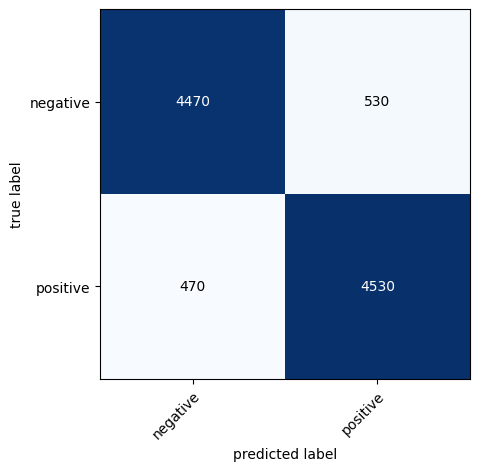

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [ ]:
clf.predict(['Wow, this is amazing lesson'])

array(['positive'], dtype=object)

In [ ]:
clf.predict(['Wow, this sucks'])

array(['negative'], dtype=object)

In [ ]:
clf.predict(['please like this video. it helps me a lot'])

array(['positive'], dtype=object)

In [ ]:
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))